In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Problem Statement : 




I) You have been given a dataset , that describes functionality(features) of houses in boston , Now based on given features predict the house price
#II) Defining Dataset

In [2]:
df = pd.read_csv('/content/Housing.csv')

#EDA EXPLORATORY DATA SET :

In [3]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [8]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [12]:
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [15]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [16]:
# yes -> 1
#no -> 0
newdf = df.copy()

In [19]:
newdf.mainroad.replace(['yes' , 'no'] , [1, 0]).value_counts()

1    468
0     77
Name: mainroad, dtype: int64

In [21]:
newdf.mainroad.replace(['yes' , 'no'] , [1, 0] , inplace = True)  # to reflect final change to df as well

In [24]:
df.mainroad.replace(['yes' , 'no'] , [1, 0] , inplace = True) 
df.mainroad.dtypes

dtype('int64')

In [29]:
#GUestRooms :
df.guestroom.unique

<bound method Series.unique of 0       no
1       no
2       no
3       no
4      yes
      ... 
540     no
541     no
542     no
543     no
544     no
Name: guestroom, Length: 545, dtype: object>

In [31]:
df.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [33]:
df.guestroom.replace(['yes' , 'no'] , [1, 0] , inplace = True)
df.guestroom.value_counts()

0    448
1     97
Name: guestroom, dtype: int64

In [35]:
df.basement.unique


0    448
1     97
Name: guestroom, dtype: int64

In [37]:
df.basement.value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [44]:
df.basement.replace(['yes' , 'no'] , [1, 0] , inplace = True)
df.basement.value_counts()

0    354
1    191
Name: basement, dtype: int64

In [ ]:
df.head()

In [49]:
df.hotwaterheating.replace(['yes' , 'no'] , [1, 0] , inplace = True)
df.airconditioning.replace(['yes' , 'no'] , [1, 0] , inplace = True)
df.prefarea.replace(['yes' , 'no'] , [1, 0] , inplace = True)


In [50]:
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

In [51]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [52]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [55]:
df.furnishingstatus.replace(['semi-furnished' , 'unfurnished' , 'furnished'] , [2,0,1] , inplace = True)
df.head()


price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 1  
1                 1  
2                 2  
3                 1  
4                 1

#OBSERVATIONS 
Data strength : 545

Random vars : that stores data : 13  -> dependent(target) is PRICE col i.e  1

features(independent) : from head untill tail

cols are obj,int values

No NULL value in any col

#MANIPULATION
changed categorical val to numerical value


In [57]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [61]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000000    0.000000         0.000000         0.000000   
25%      1.000000    0.000000    0.000000         0.000000         0.000000   
50%      1.000000    0.000000    0.000000         0.000000         0.000000   
75%      1.000000    0.000000    1.000000         0.000000         1.000000   
max      1.000000    1.000000    1.000000         1.000000         1.000000   

          parking    prefarea  furnishingstatus  
count  545.000000  545.000000        545.000000  
mean     0.693578    0.234862          1.089908  
std      0.861586    0.424302          0.858130  
min      0.000000    0.000000          0.000000  
25%      0.000000    0.000000          0.000000  
50%      0.000000    0.000000          1.000000  
75%      1.000000    0.000000          2.000000  
max      3.000000    1.000000          2.000000

In [62]:
df.corr()  # df.corr gives 1-D dt but df.corr() gives 2-D form

price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  0.234779  0.079023   0.063472  0.044425  0.199876   
furnishingstatus  0.190086  0.081367  0.097834   0.089418  0.043288  0.079403   

                  guestroom  basement  hotwaterheating  airconditioning  \
price              0.255517  0.187057         0.093073         0.452954   
area               0.140297  0.047417        -0.009229         0.222393   
bedrooms           0.080549  0.097312         0.046049         0.160603   
bathrooms          0.126469  0.102106         0.067159         0.186915   
stories            0.043538 -0.172394         0.018847         0.293602   
mainroad           0.092337  0.044002        -0.011781         0.105423   
guestroom          1.000000  0.372066        -0.010308         0.138179   
basement           0.372066  1.000000         0.004385         0.047341   
hotwaterheating   -0.010308  0.004385         1.000000        -0.130023   
airconditioning    0.138179  0.047341        -0.130023         1.000000   
parking            0.037466  0.051497         0.067864         0.159173   
prefarea           0.160897  0.228083        -0.059411         0.117382   
furnishingstatus   0.057513  0.093425         0.069076         0.020887   

                   parking  prefarea  furnishingstatus  
price             0.384394  0.329777          0.190086  
area              0.352980  0.234779          0.081367  
bedrooms          0.139270  0.079023          0.097834  
bathrooms         0.177496  0.063472          0.089418  
stories           0.045547  0.044425          0.043288  
mainroad          0.204433  0.199876          0.079403  
guestroom         0.037466  0.160897          0.057513  
basement          0.051497  0.228083          0.093425  
hotwaterheating   0.067864 -0.059411          0.069076  
airconditioning   0.159173  0.117382          0.020887  
parking           1.000000  0.091627          0.114405  
prefarea          0.091627  1.000000          0.037823  
furnishingstatus  0.114405  0.037823          1.000000

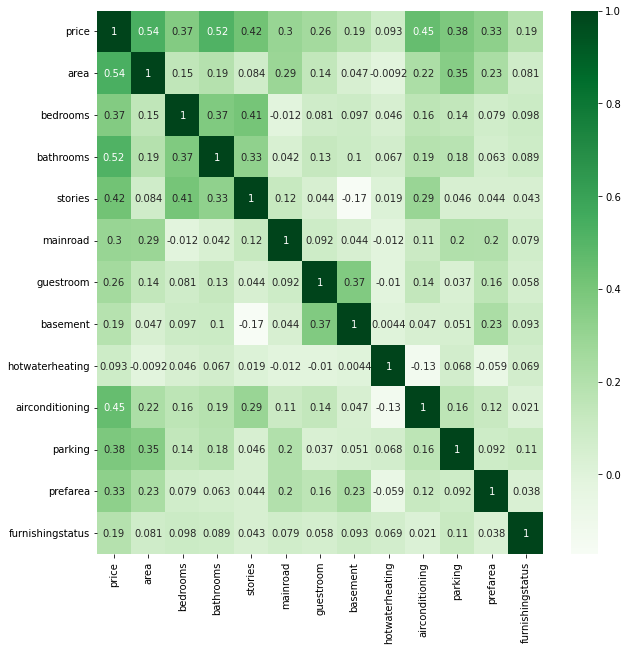

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot = True , cmap="Greens")

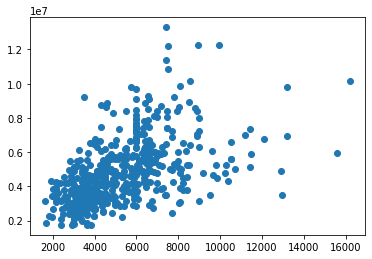

In [67]:
#relation between area,price
plt.scatter(df.area,df.price)
#handle outliers by boxplot

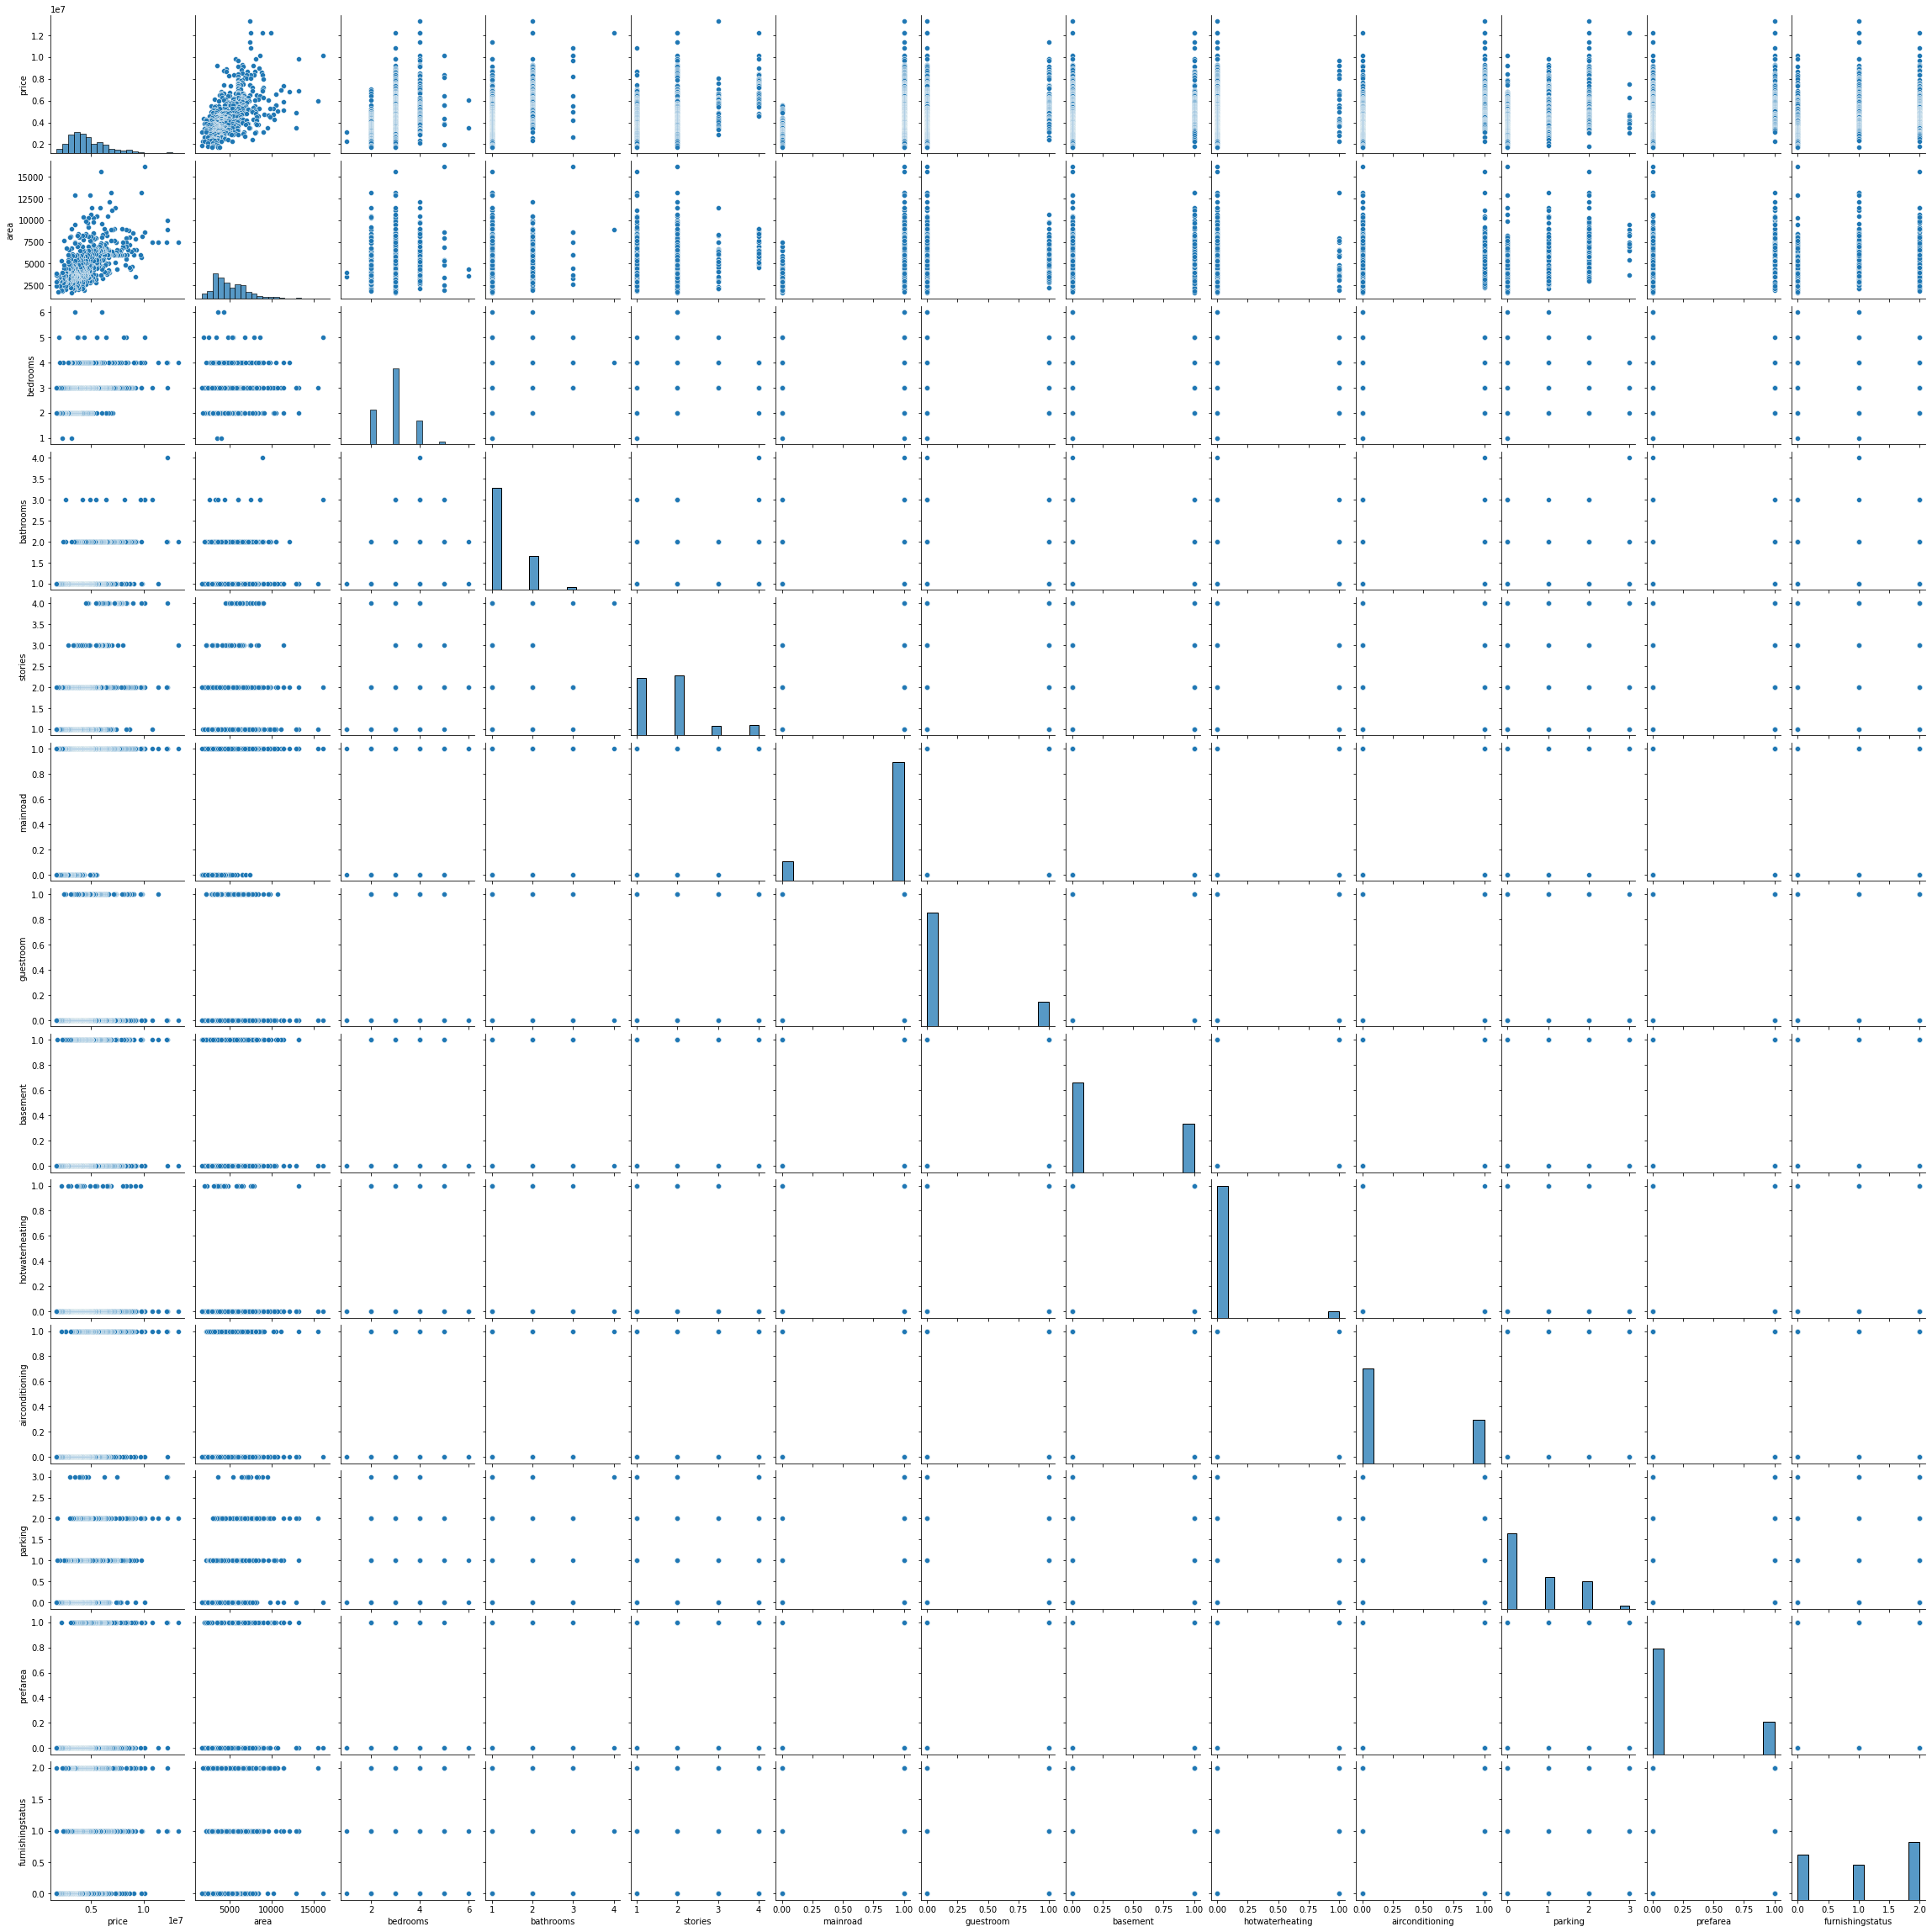

In [68]:
#can't do above step for all features so we have pairplot
sns.pairplot(df)

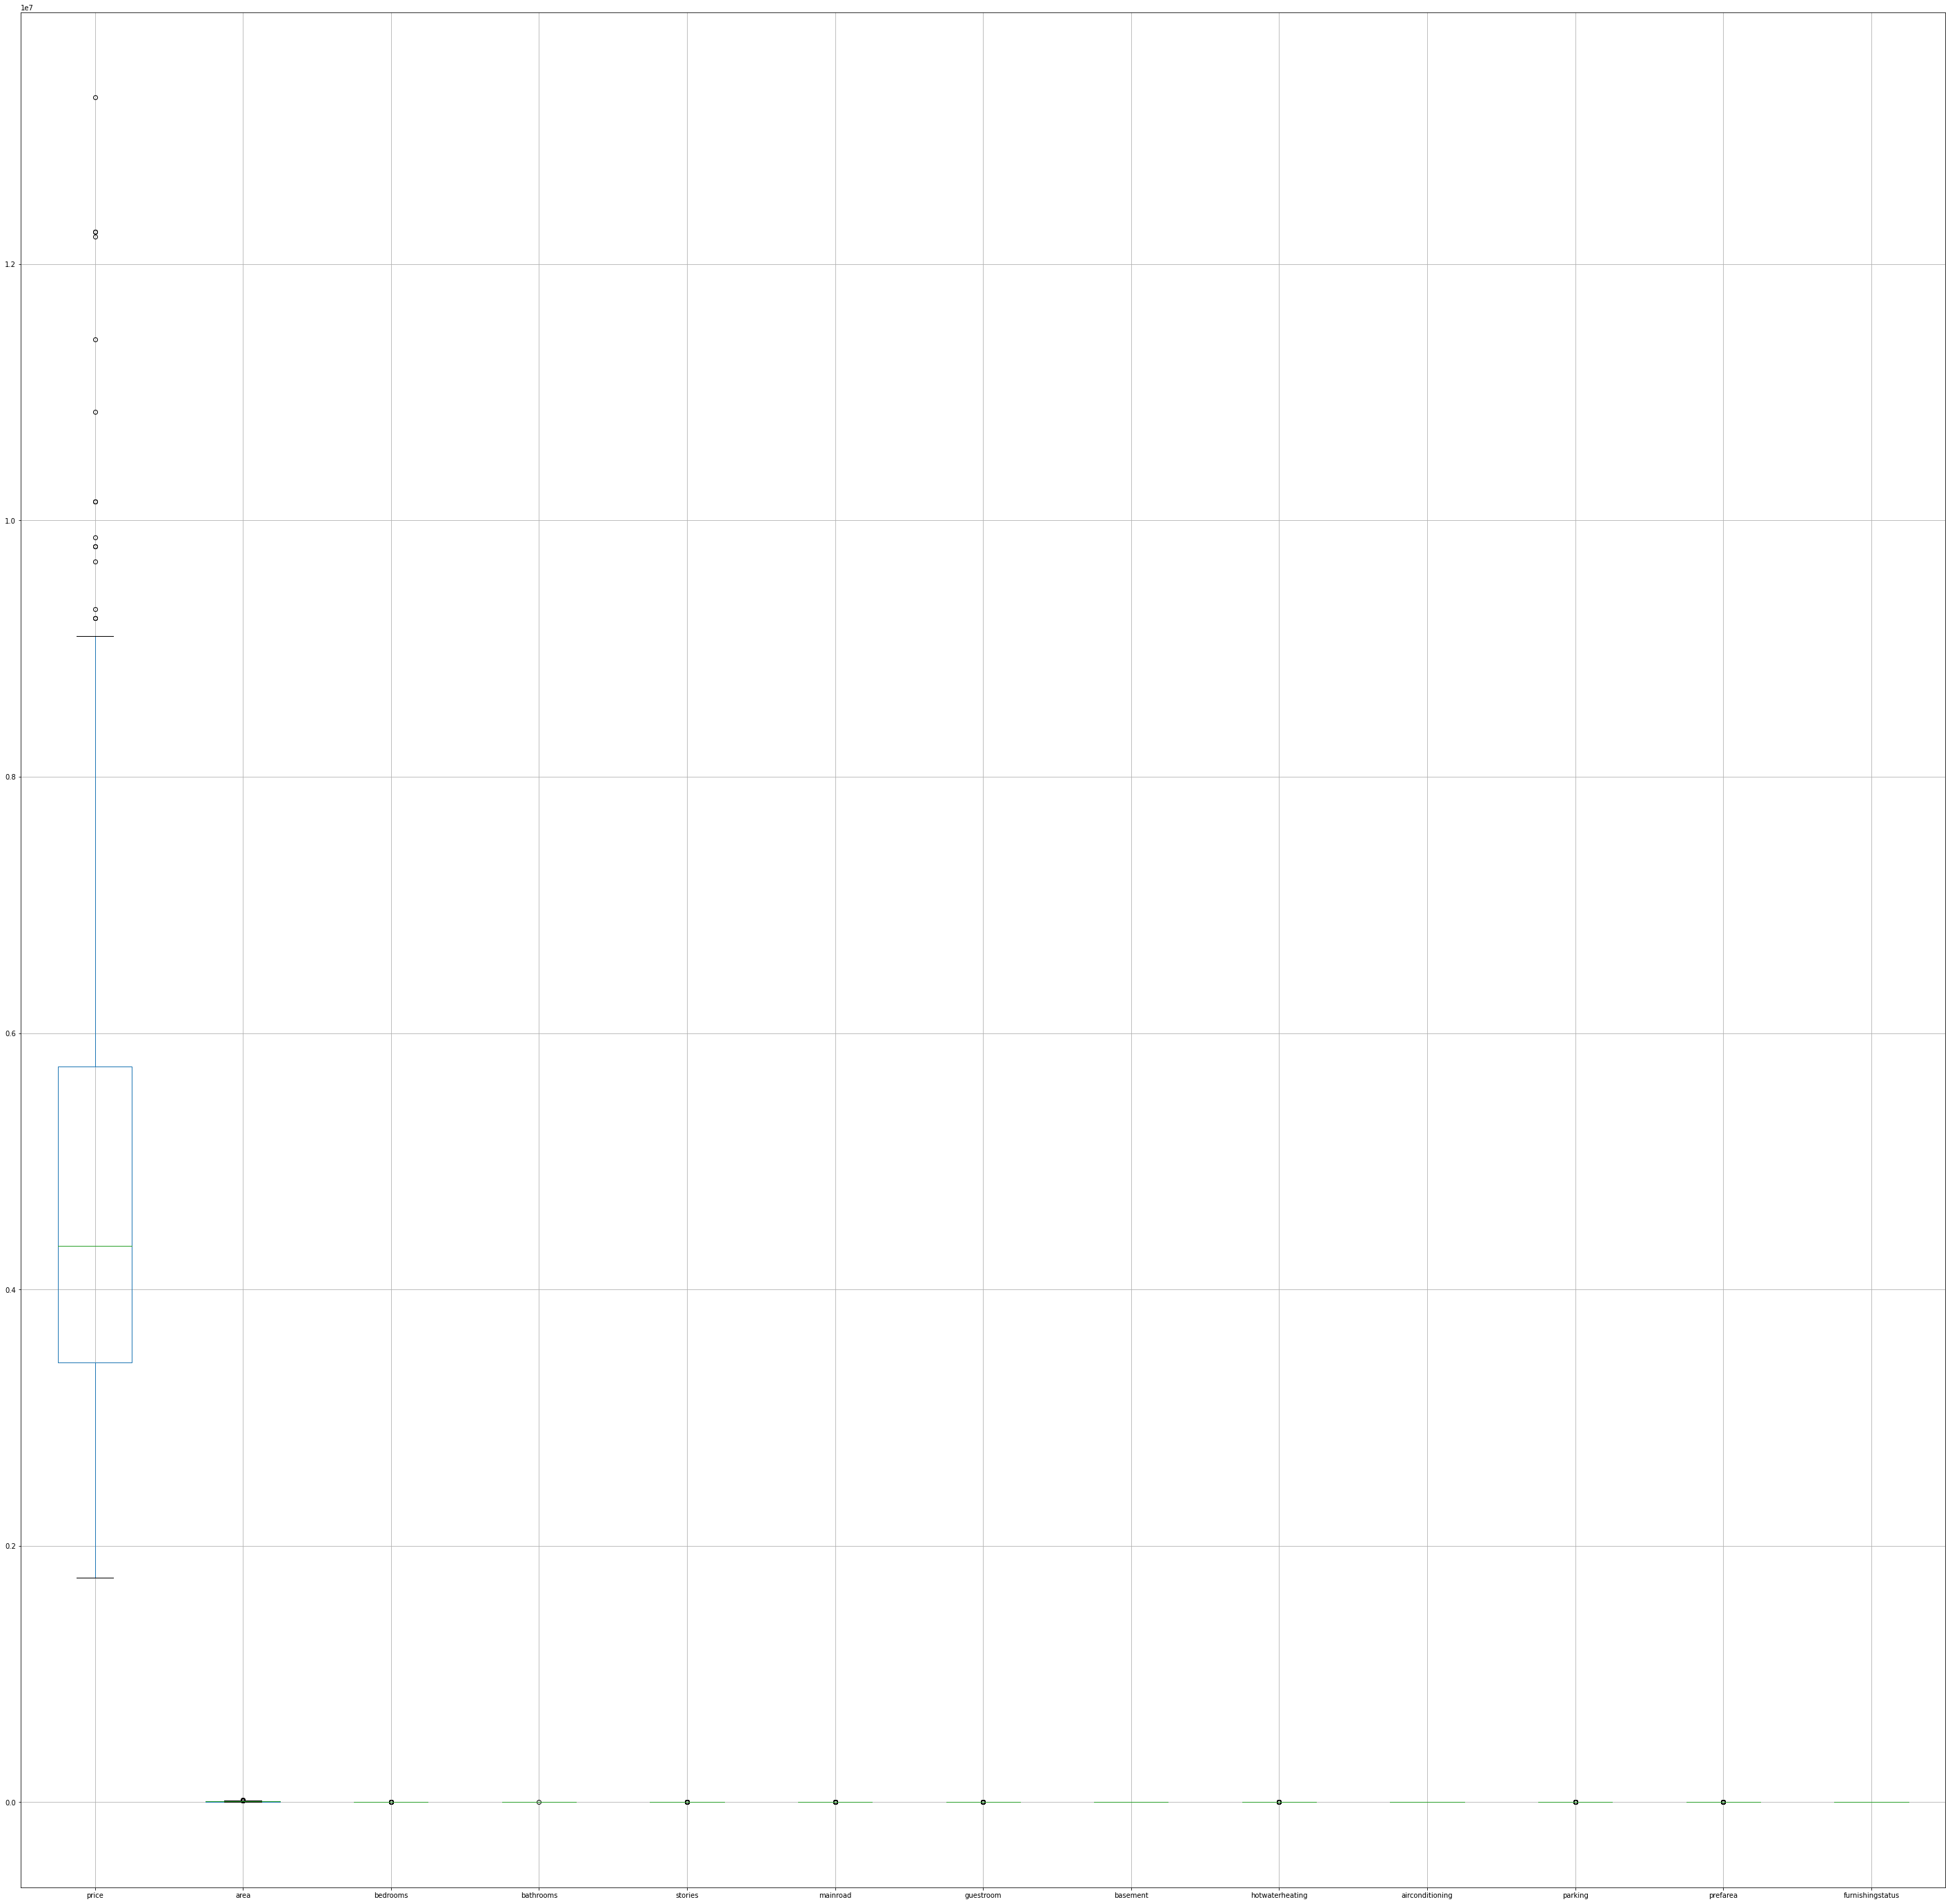

In [70]:
#handle outliers by boxplot
plt.figure(figsize=(50,50))
df.boxplot()

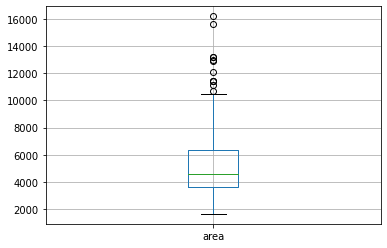

In [72]:
df[['area']].boxplot()

In [ ]:
#remove those outliers by z-score test (obs-mean)/stdev    i.e   i(each obs in box)  -  mean(area , i.e those in box)  /  std dev(ar)

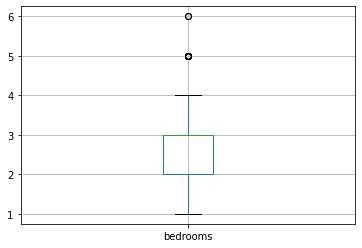

In [73]:
df[['bedrooms']].boxplot()  # min =2,max=4 1stquartile = 2 , 3rd quartile = 3

In [76]:
#how many outliers in bedrooms ( obs more than 4) :
df.bedrooms.loc[df.bedrooms > 4]
#OR
count =0
for i in df['bedrooms']:
  if i>4:
    count+=1
print(count)  # so 5,6 occurs rarely 
df.shape # give s545 dt pts among these 12 in bderoom col r outliers

12


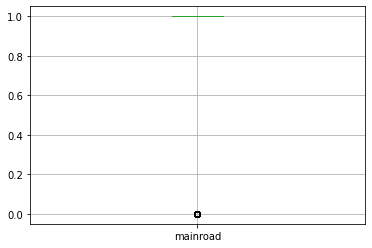

In [77]:
df[['mainroad']].boxplot()  # here 0 is an outlier implies 0 is not occuring frequently

In [81]:
len(df.mainroad.loc[df.mainroad == 0])

77

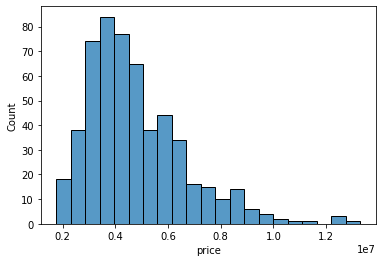

In [82]:
sns.histplot(df.price)  # positive skew , bell curve , majority of data is in 97.5% from left

In [85]:
#what is price of house , where bedrm =4 , bathrom = 2  --->> if we hav dt point at (4,2) then is a dt anl else it is a ML part
df.loc[df.bedrooms==4,['price','bedrooms','bathrooms']][df.bathrooms==2]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


price  bedrooms  bathrooms
0    13300000         4          2
3    12215000         4          2
12    9310000         4          2
13    9240000         4          2
16    9100000         4          2
25    8540000         4          2
29    8400000         4          2
32    8295000         4          2
37    7980000         4          2
39    7910000         4          2
43    7700000         4          2
44    7560000         4          2
52    7350000         4          2
57    7245000         4          2
58    7210000         4          2
62    7070000         4          2
63    7035000         4          2
69    6790000         4          2
71    6755000         4          2
75    6650000         4          2
94    6300000         4          2
106   6160000         4          2
109   6090000         4          2
122   5950000         4          2
123   5950000         4          2
136   5740000         4          2
141   5652500         4          2
142   5600000         4          2
149   5600000         4          2
157   5495000         4          2
162   5460000         4          2
169   5250000         4          2
173   5250000         4          2
175   5250000         4          2
180   5215000         4          2
212   4893000         4          2
213   4893000         4          2
221   4767000         4          2
229   4690000         4          2
238   4613000         4          2
249   4543000         4          2
292   4200000         4          2
294   4200000         4          2
316   4060000         4          2
337   3920000         4          2
339   3885000         4          2
383   3570000         4          2
523   2380000         4          2

#Splitting dataset  into 80% giving to train model , 20% to predict the same

In [86]:
df.head(2)

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   

   furnishingstatus  
0                 1  
1                 1

In [90]:
x=df[df.columns[1:]]   # features , except price column , needs to be in 2-D form
y=df.price   # is target so in form 0f 1-D

#so in x , all cols r there except which we need to drop price colmn
df.drop('price' , axis=1)  # but this price col is in between then use slicing


area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0                1        2         1                 1  
1                  0                1        3         0                 1  
2                  0                0        2         1                 2  
3                  0                1        3         1                 1  
4                  0                1        2         0                 1  
..               ...              ...      ...       ...               ...  
540                0                0        2         0                 0  
541                0                0        0         0                 2  
542                0                0        0         0                 0  
543                0                0        0         0                 1  
544                0                0        0         0                 0  

[545 rows x 12 columns]

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [93]:
x.ndim

2

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=None)  # giving 20% of dtsets for testing , automatically takes 80% to train_size  random_state means that every time i run this picks some random vals when rand_state is 1 you ghet same patter of randomness everytime u run this
#so it stores some kind of pattern , so that accuracy is always same when rand_state is any other dt 

In [96]:
len(x_train)  # 80% of dtset = 436


436

In [97]:
len(y_train)

436

In [98]:
print(len(x_test))
print(len(y_test))

109
109


In [ ]:
#so approach is :
 #we give x_train , y_train for training purpose , and x_test,y_test for testing, purpose , now this x_test  will be given to model , which is been trained by x_train and y_train  now this model gives 
 #pred_y_test then we compare this with actual y_test for corelation, perfomance'''

#MODELLING | TRAINING

In [99]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [100]:
model.intercept_  #  'c' value

-402888.78163193073

In [101]:
model.coef_  #  this is coeff(m val)) for each of feature col that it has choosen  

array([2.38013692e+02, 1.25247885e+05, 1.00949768e+06, 4.83654090e+05,
       3.77029329e+05, 3.13671754e+05, 3.39344938e+05, 5.36611527e+05,
       9.06030335e+05, 3.42662301e+05, 6.60327158e+05, 1.70685608e+05])

#PREDICTION 

In [102]:
y_test  #actual values

531    2233000
423    3360000
492    2800000
77     6650000
424    3360000
        ...   
228    4690000
496    2695000
126    5880000
178    5229000
251    4515000
Name: price, Length: 109, dtype: int64

In [103]:
y_pred = model.predict(x_test)  # predicted y_test values
y_pred

array([ 4293836.70496259,  2735587.31870664,  3639433.58633032,
        7103973.93607159,  3368219.33501617,  3415491.18158261,
        6921889.31960426,  2395082.0004656 ,  4184775.16657895,
        4080481.83876919,  5805611.60166633,  2205938.53111481,
        2848353.12602353,  2681728.26540088,  3419139.43615355,
        6171492.67924801,  8088652.85337132,  2836888.09511276,
        4923885.20139224,  6957089.69702374,  2765048.33388301,
        3617249.61562258,  2745322.98864981,  6644612.91403374,
        3086459.56009991,  4324481.74488038,  3635416.78044014,
        2584373.05036213,  4877507.27479238,  4564524.08618522,
        2916008.59688066,  3020734.62128588,  6886614.45285202,
        7114626.65929146, 10073452.28290262,  2574637.38041896,
        3092492.58710132,  3556681.63388761,  3972749.19310876,
        4989797.05472561,  2906455.60465195,  2946038.73268266,
        4845308.09594214,  5434784.21303918,  2674164.14555511,
        4140996.07990126,  2852429.14997

#PERFOMANCE :

In [107]:
newdf = pd.DataFrame({"actual value" :y_test , "predicted vals" :y_pred})
newdf

actual value  predicted vals
531       2233000    4.293837e+06
423       3360000    2.735587e+06
492       2800000    3.639434e+06
77        6650000    7.103974e+06
424       3360000    3.368219e+06
..            ...             ...
228       4690000    4.217376e+06
496       2695000    2.669843e+06
126       5880000    5.232211e+06
178       5229000    5.869403e+06
251       4515000    4.171216e+06

[109 rows x 2 columns]

In [111]:
r2_score(y_test,y_pred)

0.73827367849809

Text(0.5, 1.0, 'Actual Price v/s Predicted price')

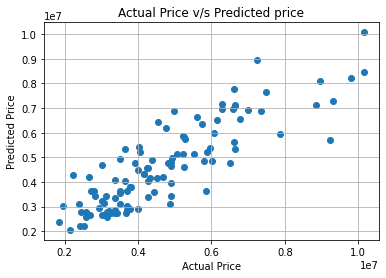

In [110]:
#SCATTER PLOT :
plt.scatter(newdf['actual value'],newdf['predicted vals'])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.title("Actual Price v/s Predicted price")


In [112]:
newdf.corr()   # so model is around 80 % predicting correctly

actual value  predicted vals
actual value        1.000000        0.861509
predicted vals      0.861509        1.000000

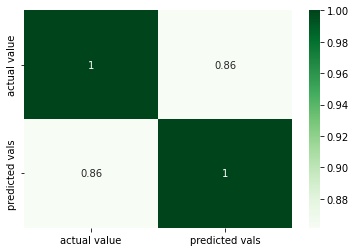

In [113]:
# visualize correln
sns.heatmap(newdf.corr(), annot=True , cmap="Greens")  # this correln means only for that one feature specifically , accuracy is 86%

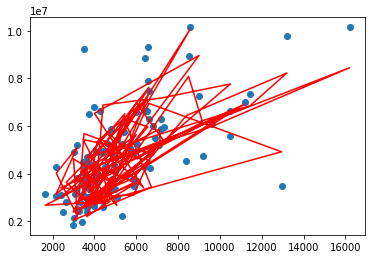

In [114]:
# to see best fit line in area colmn
#simple lin regrsn
plt.scatter(x_test.area,y_test)
plt.plot(x_test.area,y_pred, color='red')
#here features r more so there are more lines coz is dependent on other features other than area too

In [ ]:
#user interactive : 
a = int(input("enter desired area"))
model.predict([a,__,__,__])
print(b)

r2_score of 
1 : perfect positive
0.79-0.99 : strong postive
0.78-0.5 : moderate  positve
